# Ingreso y limpieza de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cierre_cartera_2017_2021.csv', encoding="utf-8",low_memory=False, 
         dtype = { # indicate categorical variables
        'PAGARE':'str',
        'NRO SOLICITUD': "object",
        'OBLIGACION': "object",
        "HOMOLOGACION DOCUMENTO DE IDENTIDAD": "object",
        'NOM TIPOCLIENTE': "category",
        "SUCURSAL": "category",
        'REGION': "category",
        'UBICACIO CLIENTE': "category",
        "VALOR CUOTA": "object", 
        'PERIODICIDAD': "category",
        'CALIFICACION CIERRE': "category",
        'LINEA': "category",
        'COD MODALIDAD': "object",
        "CAPITAL VEN": "str", 
        "INTERES VEN": "str",
        'COMISION': "object",
        'OTROS': "object",
        'MORA':"str",
        'TIPO CREDITO':"category",
         'MONTO':'str'    
        
    }, 

    parse_dates=["FEC SOLICITUD",'FEC APROBA',
                 'FEC DESEMBOLSO','FEC ULT.PAGO',
                 'FEC PROXIMO PAGO','VENCIMIENTO FINAL',
                'Fecha'], # the Sale_date column is parsed as a date 
                )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806075 entries, 0 to 806074
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Unnamed: 0                           806075 non-null  int64         
 1   Tipo                                 806075 non-null  float64       
 2   NRO SOLICITUD                        806074 non-null  object        
 3   OBLIGACION                           806075 non-null  object        
 4   PAGARE                               806074 non-null  object        
 5   HOMOLOGACION DOCUMENTO DE IDENTIDAD  796229 non-null  object        
 6   COD TIPO CLIENTE                     806075 non-null  float64       
 7   NOM TIPOCLIENTE                      806075 non-null  category      
 8   SUCURSAL                             77338 non-null   category      
 9   REGION                               806075 non-null  category      
 

In [3]:
df = df.drop(columns = ['SEGURO VIDA','COD LINEA','COD TIPO CLIENTE','GARNTIA REAL','Tipo','OTROS','Unnamed: 0']) 

df[["SUCURSAL","SUCURS","SUCURSAL REAL","SUCURSALES","SUCURSAL.1"]] = df[["SUCURSAL",
                                                                          "SUCURS",
                                                                          "SUCURSAL REAL",
                                                                          "SUCURSALES",
                                                                          "SUCURSAL.1"]].astype(str)
names = list(range(0,15))
names = [float(i) for i in names]
names = [str(i) for i in names]
names

df = df.replace('nan',np.nan)
df[["SUCURSAL","SUCURS","SUCURSAL REAL","SUCURSALES","SUCURSAL.1"]] = df[["SUCURSAL",
                                                                          "SUCURS",
                                                                          "SUCURSAL REAL",
                                                                          "SUCURSALES",
                                                                          "SUCURSAL.1"]].replace(names,np.nan)

df["SUCURSAL"] = df["SUCURSAL"].fillna(df["SUCURS"])
df["SUCURSAL"] = df["SUCURSAL"].fillna(df["SUCURSAL REAL"])
df["SUCURSAL"] = df["SUCURSAL"].fillna(df["SUCURSAL.1"])
df["SUCURSAL"].value_counts()

df = df.drop(columns = ["SUCURS","SUCURSAL REAL","SUCURSALES","SUCURSAL.1"])



In [4]:
# Eliminar filas repetidas
df = df.drop_duplicates()

In [5]:

# Eliminar comas en valor cuota para que lo reconozca como numero
df['VALOR CUOTA'] = df['VALOR CUOTA'].replace(',','',regex=True).astype("float")
df['SALDO OBLIGACION'] = df['SALDO OBLIGACION'].replace(',','',regex=True).astype("int")
df['MONTO'] = df["MONTO"].replace(",","", regex=True).astype(int)


# Eliminar comas y "-" como ceros (tener cero si es un valor a considerar no debe ser NAN) 
df['VENCIDA'] = df['VENCIDA'].replace({',':'',
                                      '-':0},regex=True).astype("int")

# Eliminar comas / "-" como ceros / Poner valores en parentesis como negativos
to_integrer = ['MORA','CAPITAL VEN','INTERES VEN','COMISION']
for i in to_integrer:
    df[i] = df[i].replace({' -   ': '0',
                                    ',': ''}, 
                                    regex = True)
    df[i] = df[i].str.strip()
    df[i] = df[i].replace({'\((\d+)\)': '-\\1'}, 
                                    regex = True).astype("float")
    

df['PORCENTAJE PAGO'] = df['PORCENTAJE PAGO'].replace('######', np.nan)

In [6]:
# Se eilimina la fila con tasa fuera de lo normal, el valor de la Obligación y pagaré son atípicos
df.drop(index = 793180, inplace = True)
df.reset_index(inplace = True)

# Datos nulos

In [8]:
null_values = df.isnull().sum().reset_index(name = 'Count')
null_values = null_values.drop(null_values[null_values["Count"]==0].index)
null_values

,index,Count
4,HOMOLOGACION DOCUMENTO DE IDENTIDAD,9845
9,UBICACIO CLIENTE,1
14,VALOR CUOTA,1
15,CUOTAS PACTADAS,1
16,CUOTAS PENDIENTES,1
17,TASA N.A.M.V,1
18,TASA PERIODICA,1
22,COD MODALIDAD,1
23,MODALIDAD,1
31,FEC ULT.PAGO,36657


In [7]:
# Se eilimina la fila que no esta en varias columnas
df.drop(index = 199730, inplace = True)
df.reset_index(inplace = True)

# Se verifica cuales variables quedan con valores nulos
null_values = df.isnull().sum().reset_index(name = 'Count')
null_values = null_values.drop(null_values[null_values["Count"]==0].index)
null_values

,index,Count
5,HOMOLOGACION DOCUMENTO DE IDENTIDAD,9845
10,UBICACIO CLIENTE,1
15,VALOR CUOTA,1
16,CUOTAS PACTADAS,1
17,CUOTAS PENDIENTES,1
18,TASA N.A.M.V,1
19,TASA PERIODICA,1
23,COD MODALIDAD,1
24,MODALIDAD,1
32,FEC ULT.PAGO,36657


In [8]:
pd.concat([pd.DataFrame(df.dtypes), df.count()], axis=1).to_excel("info.xlsx")

# First EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790677 entries, 0 to 790676
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   level_0                              790677 non-null  int64         
 1   index                                790677 non-null  int64         
 2   NRO SOLICITUD                        790677 non-null  object        
 3   OBLIGACION                           790677 non-null  object        
 4   PAGARE                               790677 non-null  object        
 5   HOMOLOGACION DOCUMENTO DE IDENTIDAD  780832 non-null  object        
 6   NOM TIPOCLIENTE                      790677 non-null  category      
 7   SUCURSAL                             790677 non-null  object        
 8   REGION                               790677 non-null  category      
 9   MUNICIPIO CLIENTE                    790677 non-null  object        
 

Varaibles exploration

In [10]:
df['LINEA'].unique()

['GERMINA', 'CRECER', 'MI CASA', 'CONVENIO', 'CREDINEGOCIO', 'FIDELIZACION', 'GARANTIA REAL', 'CREDITO DIGITAL', 'UNETE', 'CREDINEGOCIO 25- 100 SMMLV GARANTIA REAL']
Categories (10, object): ['CONVENIO', 'CRECER', 'CREDINEGOCIO', 'CREDINEGOCIO 25- 100 SMMLV GARANTIA REAL', ..., 'GARANTIA REAL', 'GERMINA', 'MI CASA', 'UNETE']

In [11]:
df['MODALIDAD'].unique()

array(['CREDITO RURAL INDIVIDUAL - GERMINA',
       'DESARROLLO EMPRESARIAL CRECER (PYME)', 'MICROVIVIENDA',
       'D.E. FONDO Equion TAURAMENA - INTV', 'FIDELIZAR',
       'CREDITO RURAL INDIVIDUAL Trimestral - INTV',
       'DESARROLLO EMPRESARIAL 25-50 SMMLV',
       'DESARROLLO EMPRESARIAL CRECER (FNG-MY PYME)',
       'BOYACA C.R.I. GERMINA TRIMESTRAL - INTV',
       'BOYACA C.R.I. GERMINA MENSUAL - INTV',
       'DESARROLLO EMPRESARIAL CRECER (PYME) TAURAMENA',
       'DESARROLLO EMPRESARIAL CRECER (PYME) NUEVO',
       'CREDITO RURAL INDIVIDUAL - GERMINA NUEVO', 'MUJER URBANO',
       'CREDITO RURAL INDIVIDUAL GERMINA TAURAMENA', 'MUJER RURAL',
       'CREDINEGOCIO HASTA 25 SMMLV', 'MICROVIVIENDA TAURAMENA',
       'CREDINEGOCIO 25- 64 SMMLV',
       'DESARROLLO EMPRESARIAL 25-50 SMMLV TAURAMENA',
       'DESARROLLO EMPRESARIAL 25-50 SMMLV NUEVO',
       'DESARROLLO EMPRESARIAL CRECER (PYME) RENOVACION',
       'CREDINEGOCIO 25- 100 SMMLV', 'CRÉDI COSECHA',
       'CREDINEGOCIO

In [12]:
df['CALIFICACION CIERRE'].unique()

['A', 'B', 'E', 'C', 'D']
Categories (5, object): ['A', 'B', 'C', 'D', 'E']

In [14]:
df['TIPO CREDITO'].unique()

['NUEVO', 'RETANQUEADO', 'RENOVADO', 'SIN PERFIL', 'PARALELO', 'SIN_PERFIL']
Categories (6, object): ['NUEVO', 'PARALELO', 'RENOVADO', 'RETANQUEADO', 'SIN PERFIL', 'SIN_PERFIL']

In [20]:
# One case exploration
df[(df['NRO SOLICITUD'] == '172000454.0')][['MONTO', 'FEC DESEMBOLSO', 'VALOR CUOTA',
                                    'CUOTAS PACTADAS','TASA N.A.M.V','TASA PERIODICA', 'CUOTAS PENDIENTES', 
                                     'PERIODICIDAD','SALDO OBLIGACION', 'VENCIDA','DIAS VENCIDO', 'CAPITAL VEN', 
                                             'INTERES VEN', 'MORA', 
       'FEC ULT.PAGO','FEC PROXIMO PAGO','Fecha']].sort_values('Fecha')

,MONTO,FEC DESEMBOLSO,VALOR CUOTA,CUOTAS PACTADAS,TASA N.A.M.V,TASA PERIODICA,CUOTAS PENDIENTES,PERIODICIDAD,SALDO OBLIGACION,VENCIDA,DIAS VENCIDO,CAPITAL VEN,INTERES VEN,MORA,FEC ULT.PAGO,FEC PROXIMO PAGO,Fecha
554330,5000000,2017-05-31,244949.0,36.0,35.28,2.94,36.0,Mensual,5000000,0,0.0,0.0,0.0,0.0,NaN,2017-06-30,2017-05-01
413037,5000000,2017-05-31,244949.0,36.0,35.28,2.94,36.0,Mensual,5000000,0,0.0,73094.0,147000.0,86.0,NaN,2017-06-30,2017-06-01
353353,5000000,2017-05-31,244949.0,36.0,35.28,2.94,34.0,Mensual,4851336,0,0.0,0.0,-34285.0,0.0,31/07/2017,2017-08-31,2017-07-01
84341,5000000,2017-05-31,244949.0,36.0,35.28,2.94,34.0,Mensual,4851336,0,0.0,78129.0,108344.0,0.0,4/09/2017,2017-08-31,2017-08-01
738391,5000000,2017-05-31,244949.0,36.0,35.28,2.94,33.0,Mensual,4773207,0,0.0,80775.0,125557.0,95.0,6/10/2017,2017-09-30,2017-09-01
682042,5000000,2017-05-31,244949.0,36.0,35.28,2.94,32.0,Mensual,4692432,0,0.0,83509.0,118705.0,99.0,6/10/2017,2017-10-31,2017-10-01
625339,5000000,2017-05-31,244949.0,36.0,35.28,2.94,31.0,Mensual,4608923,0,0.0,86338.0,112582.0,0.0,14/11/2017,2017-11-30,2017-11-01
151541,5000000,2017-05-31,244949.0,36.0,35.28,2.94,29.0,Mensual,4348804,0,0.0,-84520.0,-341.0,0.0,28/12/2017,2018-01-31,2017-12-01
215683,5000000,2017-05-31,244949.0,36.0,35.28,2.94,29.0,Mensual,4348804,0,0.0,7763.0,127514.0,0.0,28/12/2017,2018-01-31,2018-01-01
292174,5000000,2017-05-31,244949.0,36.0,35.28,2.94,28.0,Mensual,4341041,0,0.0,95409.0,46859.0,119.0,6/02/2018,2018-02-28,2018-02-01


### Variables through time

In [48]:
#df.to_csv('Cartera_final_2.csv')

<AxesSubplot:xlabel='Fecha', ylabel='SALDO OBLIGACION'>

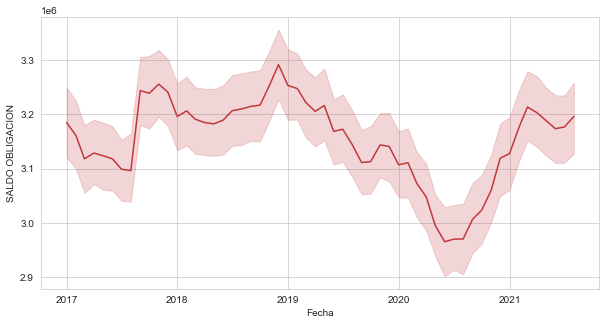

In [10]:
# Evoución de los saldos a traves del tiempo
plt.figure(figsize=(10, 5)) 
sns.set_palette("RdBu")
sns.set_style('whitegrid')
sns.lineplot(data=df, x="Fecha", y="SALDO OBLIGACION")

Text(0.5, 1.0, '')

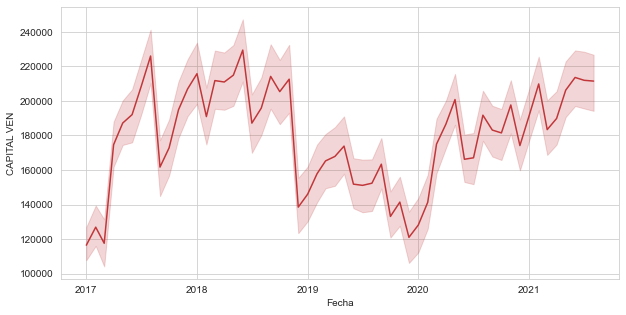

In [11]:
# Evolucion capital vencido a traves del tiempo
plt.figure(figsize=(10, 5)) 
sns.set_palette("RdBu")
sns.set_style('whitegrid')
sns.lineplot(data=df, x="Fecha", y='CAPITAL VEN')
plt.title('')

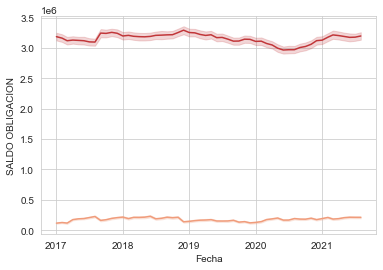

In [12]:
fig, ax = plt.subplots()
ax= sns.lineplot(x='Fecha', y='SALDO OBLIGACION', data=df)
ax1 = sns.lineplot(x='Fecha', y='CAPITAL VEN', data=df)

Text(0.5, 1.0, 'Dias vencido (2017 - 2021)')

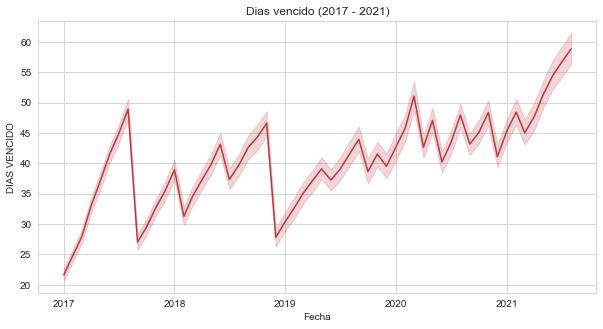

In [14]:
# Dias vencidos a travez del tiempo
plt.figure(figsize=(10, 5)) 
sns.set_palette("RdBu")
sns.set_style('whitegrid')
sns.lineplot(data=df, x="Fecha", y="DIAS VENCIDO")
plt.title('Dias vencido (2017 - 2021)')

In [15]:
def assign_label(row):  
    if row['NRO SOLICITUD'] ==  row['OBLIGACION']: 
        label = "Igual"   
    else:  
        label = "Diferente" 
    return label  


df['Comparacion'] = df.apply(lambda row:assign_label(row), axis = 1) 
df['Comparacion'].value_counts()/806075

Diferente    0.752875
Igual        0.228023
Name: Comparacion, dtype: float64

## Pivot tables

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790678 entries, 0 to 790677
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   index                                790678 non-null  int64         
 1   NRO SOLICITUD                        790677 non-null  object        
 2   OBLIGACION                           790678 non-null  object        
 3   PAGARE                               790677 non-null  object        
 4   HOMOLOGACION DOCUMENTO DE IDENTIDAD  780833 non-null  object        
 5   NOM TIPOCLIENTE                      790678 non-null  category      
 6   SUCURSAL                             790678 non-null  object        
 7   REGION                               790678 non-null  category      
 8   MUNICIPIO CLIENTE                    790678 non-null  object        
 9   UBICACIO CLIENTE                     790677 non-null  category      
 

In [37]:
df['TIPO CREDITO'].value_counts()

NUEVO          340642
RENOVADO       201498
RETANQUEADO    158276
PARALELO        77928
SIN PERFIL       9447
SIN_PERFIL       2886
Name: TIPO CREDITO, dtype: int64

In [17]:
df_mora = df.copy()
df_mora["DIAS VENCIDO"] = df_mora["DIAS VENCIDO"].replace(0, np.nan)

pivot_clientes = pd.pivot_table( 

    df_mora, 
    values="DIAS VENCIDO", 
    index=['NRO SOLICITUD','HOMOLOGACION DOCUMENTO DE IDENTIDAD'], 
    columns="Fecha", 
    aggfunc= 'count'

).reset_index() 
pivot_clientes.head()

Fecha,NRO SOLICITUD,HOMOLOGACION DOCUMENTO DE IDENTIDAD,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,...,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00
0,1710000001.0,FA12212,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1710000002.0,FA15329,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1710000003.0,FA23339,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1710000004.0,FA12151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1710000005.0,FA23325,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
pivot_clientes_tota = pd.pivot_table( 

    df, 
    values="PAGARE", 
    index=['NRO SOLICITUD','HOMOLOGACION DOCUMENTO DE IDENTIDAD'], 
    columns="Fecha", 
    aggfunc= 'count'

).reset_index() 
clientes_total = pivot_clientes_tota.sum(axis = 0, skipna = True).reset_index()
clientes_total.drop(index = [0,1], inplace = True)
clientes_total.rename(columns = {'Fecha':'FECHA', 0:'Total de clientes'}, inplace = True)
clientes_total.head()

,FECHA,Total de clientes
2,2017-01-01 00:00:00,15523.0
3,2017-02-01 00:00:00,15461.0
4,2017-03-01 00:00:00,15562.0
5,2017-04-01 00:00:00,15396.0
6,2017-05-01 00:00:00,15374.0


In [19]:
clientes_mora = pivot_clientes.sum(axis = 0, skipna = True).reset_index()
clientes_mora.drop(index = [0,1], inplace = True)
clientes_mora.rename(columns = {'Fecha':'FECHA', 0:'CANTIDAD CLIENTES EN MORA'}, inplace = True)
clientes_mora.head()

,FECHA,CANTIDAD CLIENTES EN MORA
2,2017-01-01 00:00:00,4797.0
3,2017-02-01 00:00:00,4775.0
4,2017-03-01 00:00:00,4524.0
5,2017-04-01 00:00:00,4999.0
6,2017-05-01 00:00:00,4893.0


In [20]:
porcetaje_mora = clientes_mora.merge(clientes_total, on= 'FECHA')
porcetaje_mora['Proporcion clientes en mora'] = (porcetaje_mora['CANTIDAD CLIENTES EN MORA']/porcetaje_mora['Total de clientes'])*100
porcetaje_mora

,FECHA,CANTIDAD CLIENTES EN MORA,Total de clientes,Proporcion clientes en mora
0,2017-01-01 00:00:00,4797.0,15523.0,30.902532
1,2017-02-01 00:00:00,4775.0,15461.0,30.88416
2,2017-03-01 00:00:00,4524.0,15562.0,29.070814
3,2017-04-01 00:00:00,4999.0,15396.0,32.469473
4,2017-05-01 00:00:00,4893.0,15374.0,31.82646
5,2017-06-01 00:00:00,5335.0,15483.0,34.457147
6,2017-07-01 00:00:00,5229.0,15665.0,33.380147
7,2017-08-01 00:00:00,5234.0,15680.0,33.380102
8,2017-09-01 00:00:00,4111.0,14376.0,28.596272
9,2017-10-01 00:00:00,4008.0,14377.0,27.87786


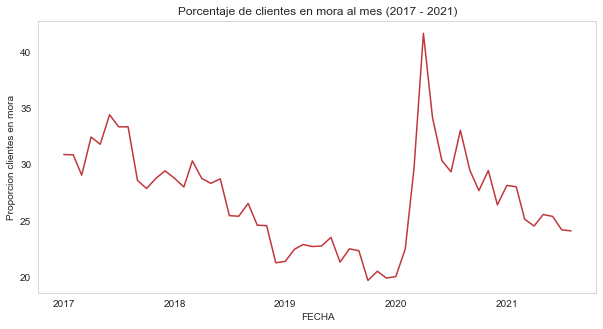

In [21]:
plt.figure(figsize=(10, 5)) 
sns.set_palette("RdBu")
sns.set_style('whitegrid')
sns.lineplot(data=porcetaje_mora, x="FECHA", y='Proporcion clientes en mora')
plt.title('Porcentaje de clientes en mora al mes (2017 - 2021)')
plt.grid()

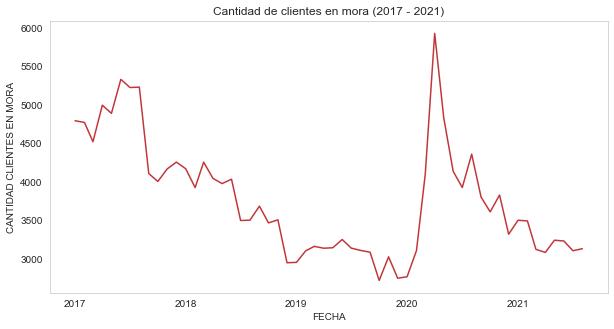

In [22]:
plt.figure(figsize=(10, 5)) 
sns.set_palette("RdBu")
sns.set_style('whitegrid')
sns.lineplot(data=clientes_mora, x="FECHA", y="CANTIDAD CLIENTES EN MORA")
plt.title('Cantidad de clientes en mora (2017 - 2021)')
plt.grid()